In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [24]:
#Dataset
df=pd.read_csv("creditcard.csv")
print("Dataset Shape",df.shape)
display(df.head())

Dataset Shape (33760, 31)


/tmp/ipython-input-3732485939.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("creditcard.csv")


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [25]:
#Basic Data Check
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-nul

In [26]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [27]:
print("Class distribution:")
print(df["Class"].value_counts())

Class distribution:
Class
0.0    33656
1.0      103
Name: count, dtype: int64


In [28]:
#Class Imbalance Analysis
class_counts=df["Class"].value_counts()
fraud_percent=(class_counts[1]/class_counts.sum())*100
print(f"\n Fraud Percentage:{fraud_percent:.4f}%")


 Fraud Percentage:0.3051%


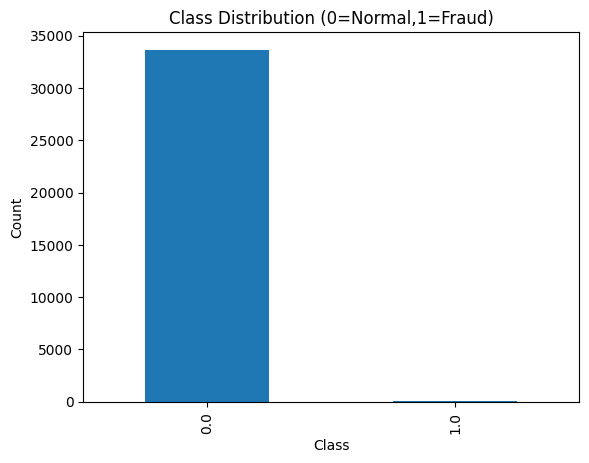

In [29]:
plt.figure()
class_counts.plot(kind='bar')
plt.title("Class Distribution (0=Normal,1=Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [30]:
#Amount Distribution
fraud=df[df["Class"]==1]
normal=df[df["Class"]==0]

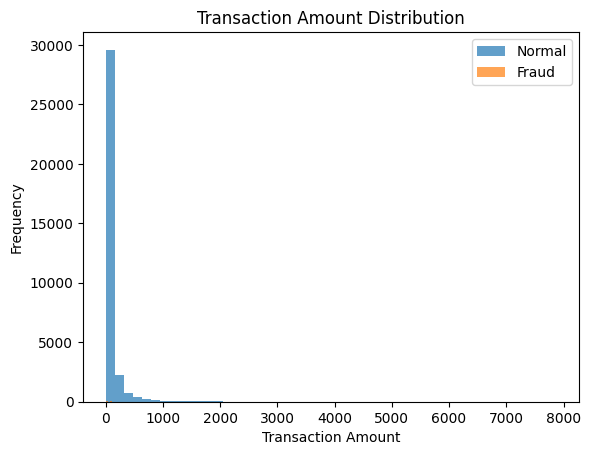

In [31]:
plt.figure()
plt.hist(normal["Amount"],bins=50,alpha=0.7,label="Normal")
plt.hist(fraud["Amount"],bins=50,alpha=0.7,label="Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Transaction Amount Distribution")
plt.legend()
plt.show()

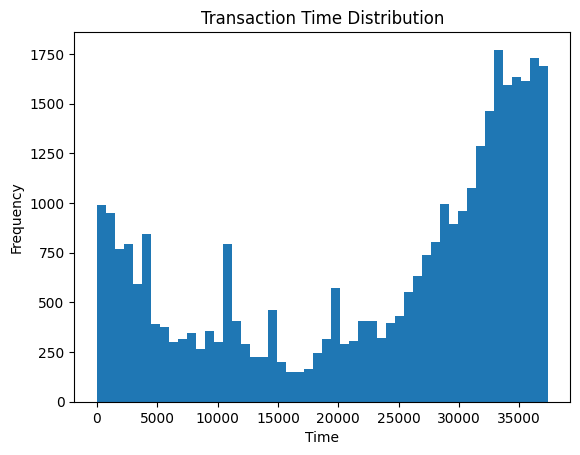

In [32]:
#Time Distribution
plt.figure()
plt.hist(df["Time"],bins=50)
plt.title("Transaction Time Distribution")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [33]:
#Feature Scaling
scaler=StandardScaler()
df["Scaled_Amount"]=scaler.fit_transform(df[["Amount"]])
df["Scaled_Time"]=scaler.fit_transform(df[["Time"]])

In [34]:
df.drop(["Amount","Time"],axis=1,inplace=True)

In [35]:
#Train Test SPLIT
df_cleaned = df.dropna(subset=['Class'])
X = df_cleaned.drop("Class", axis=1)
y = df_cleaned["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [36]:
print("\n Train/test split completed")
print("Training Size:",X_train.shape)
print("Testing Size:",X_test.shape)



 Train/test split completed
Training Size: (25319, 30)
Testing Size: (8440, 30)


In [41]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
log_model=LogisticRegression(max_iter=1000,class_weight="balanced")
log_model.fit(X_train,y_train)
log_preds=log_model.predict(X_test)
log_probs=log_model.predict_proba(X_test)[:,1]

In [43]:
print("Logistic Regression Results")
print(confusion_matrix(y_test,log_preds))
print(classification_report(y_test,log_preds))
print("ROC-AUC",roc_auc_score(y_test,log_probs))

Logistic Regression Results
[[8308  106]
 [   4   22]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      8414
         1.0       0.17      0.85      0.29        26

    accuracy                           0.99      8440
   macro avg       0.59      0.92      0.64      8440
weighted avg       1.00      0.99      0.99      8440

ROC-AUC 0.9443921303322301


In [45]:
#Random Forest Model
rf_model=RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=1
)
rf_model.fit(X_train,y_train)
rf_preds=rf_model.predict(X_test)
rf_probs=rf_model.predict_proba(X_test)[:,1]
print("Random Forest Results")
print(confusion_matrix(y_test,rf_preds))
print(classification_report(y_test,rf_preds))
print("ROC-AUC:",roc_auc_score(y_test,rf_probs))

Random Forest Results
[[8413    1]
 [   8   18]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8414
         1.0       0.95      0.69      0.80        26

    accuracy                           1.00      8440
   macro avg       0.97      0.85      0.90      8440
weighted avg       1.00      1.00      1.00      8440

ROC-AUC: 0.9792904682671738


In [46]:
#ROC CURVE COMPARISON

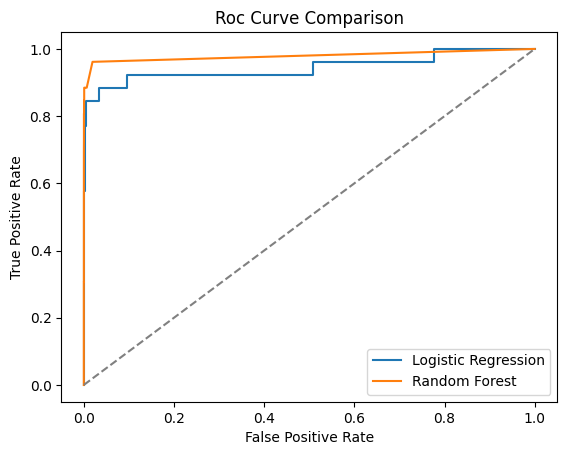

In [52]:
fpr_log,tpr_log,_=roc_curve(y_test,log_probs)
fpr_rf,tpr_rf_,_=roc_curve(y_test,rf_probs)
plt.figure()
plt.plot(fpr_log,tpr_log,label="Logistic Regression")
plt.plot(fpr_rf,tpr_rf_,label="Random Forest")
plt.plot([0,1],[0,1],linestyle="dashed", color='gray') # Changed linestyle to 'dashed' and added color for clarity
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc Curve Comparison")
plt.legend()
plt.show()

In [53]:
#Random Forest Feature Importance

In [55]:
importances=rf_model.feature_importances_
features=X.columns
importance_df=pd.DataFrame({"Feature":features,"Importance":importances}).sort_values(by="Importance",ascending=False)
print("Top 10 Important Features:")
display(importance_df.head(10))

Top 10 Important Features:


,Feature,Importance
13,V14,0.226254
3,V4,0.139647
2,V3,0.126898
9,V10,0.102149
16,V17,0.080663
10,V11,0.077304
11,V12,0.065140
15,V16,0.038627
1,V2,0.024376
6,V7,0.014182


In [56]:
#Final Fraud Prediction Function

In [60]:
def predict_transaction(transaction_data):
  transaction_data=np.array(transaction_data).reshape(1,-1)
  prob=rf_model.predict_proba(transaction_data)[0][1]
  if prob>0.5:
    return f"FRAUD DETECTED(Risk Score:{prob:.4f})"
  else:
    return f"Normal Transaction (Risk Score={prob:.4f})"

In [61]:
predict_transaction(X_test.iloc[0].values)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Normal Transaction (Risk Score=0.0000)'